<a href="https://colab.research.google.com/github/kamakshi0421/Stock_Market_Analysis/blob/main/stock_market_anaylsis_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Upload and Read the Excel File
from google.colab import files
uploaded = files.upload()

Saving stock_data_excel.xlsx to stock_data_excel (1).xlsx


In [ ]:
import pandas as pd

In [ ]:
# Load the Excel file
df = pd.read_excel("stock_data_excel.xlsx", sheet_name="Sheet1")
df.head()

,Date,Company,Open,High,Low,Close,Prev Close,Market Cap,Sector Return (%),Market Return (%),Classification
0,2024-01-01,COMP001,525.70,532.01,525.59,528.93,523.61,232268.29,1.02,0.0,Short-Term
1,2024-01-01,COMP002,194.18,199.12,190.43,193.58,192.72,289926.52,0.45,0.0,Short-Term
2,2024-01-01,COMP003,207.05,209.70,200.68,203.40,206.03,67547.90,-1.28,0.0,Short-Term
3,2024-01-01,COMP004,656.03,661.15,654.93,656.82,654.46,106372.79,0.36,0.0,Short-Term
4,2024-01-01,COMP005,523.59,525.60,517.76,521.82,521.20,71726.17,0.12,0.0,Long-Term


In [ ]:
# STEP 2: Cleaning and Handling Missing Values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date                 0
Company              0
Open                 0
High                 0
Low                  0
Close                0
Prev Close           0
Market Cap           0
Sector Return (%)    0
Market Return (%)    0
Classification       0
dtype: int64


In [ ]:
# Confirm all missing values handled
print("After cleaning:")
print(df.isnull().sum())

After cleaning:
Date                 0
Company              0
Open                 0
High                 0
Low                  0
Close                0
Prev Close           0
Market Cap           0
Sector Return (%)    0
Market Return (%)    0
Classification       0
dtype: int64


In [ ]:

# STEP 3: Feature Selection and Engineering (5 marks)
df['Price Range'] = df['High'] - df['Low']
df['Daily Return (%)'] = ((df['Close'] - df['Open']) / df['Open']) * 100

In [ ]:
# Drop unneeded column
df = df.drop(['Prev Close'], axis=1)
df.head()

,Date,Company,Open,High,Low,Close,Market Cap,Sector Return (%),Market Return (%),Classification,Price Range,Daily Return (%)
0,2024-01-01,COMP001,525.70,532.01,525.59,528.93,232268.29,1.02,0.0,Short-Term,6.42,0.614419
1,2024-01-01,COMP002,194.18,199.12,190.43,193.58,289926.52,0.45,0.0,Short-Term,8.69,-0.308992
2,2024-01-01,COMP003,207.05,209.70,200.68,203.40,67547.90,-1.28,0.0,Short-Term,9.02,-1.762859
3,2024-01-01,COMP004,656.03,661.15,654.93,656.82,106372.79,0.36,0.0,Short-Term,6.22,0.120421
4,2024-01-01,COMP005,523.59,525.60,517.76,521.82,71726.17,0.12,0.0,Long-Term,7.84,-0.338051


In [ ]:
# STEP 4: Ensuring Data Integrity and Consistency
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates found: 0


In [ ]:
# Ensure correct data types
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(df.dtypes)

Date                 datetime64[ns]
Company                      object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Market Cap                  float64
Sector Return (%)           float64
Market Return (%)           float64
Classification               object
Price Range                 float64
Daily Return (%)            float64
dtype: object


In [ ]:
# STEP 5: Summary Statistics and Insights
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                      Date         Open         High          Low  \
count                 1500  1500.000000  1500.000000  1500.000000   
mean   2024-01-05 12:00:00   554.835513   558.676747   551.041280   
min    2024-01-01 00:00:00    98.250000    99.520000    93.530000   
25%    2024-01-03 00:00:00   332.232500   335.845000   328.087500   
50%    2024-01-05 12:00:00   550.650000   555.280000   548.105000   
75%    2024-01-08 00:00:00   790.532500   792.152500   785.152500   
max    2024-01-10 00:00:00  1009.000000  1013.030000  1008.400000   
std                    NaN   261.363212   261.368888   261.464985   

             Close    Market Cap  Sector Return (%)  Market Return (%)  \
count  1500.000000    1500.00000        1500.000000        1500.000000   
mean    554.858407  277622.77550           0.507467           1.353727   
min      96.730000   50050.92000          -2.640000           0.000000   
25%     332.117500  161315.72000          -0.082500           

In [ ]:
# Insights by Classification
print("Mean returns by classification:")
print(df.groupby("Classification")[["Daily Return (%)", "Sector Return (%)"]].mean())

Mean returns by classification:
                Daily Return (%)  Sector Return (%)
Classification                                     
Long-Term              -0.027387           0.470896
Short-Term              0.016962           0.542792


In [ ]:

# STEP 6: Identifying Patterns, Trends, and Anomalies
import seaborn as sns
import matplotlib.pyplot as plt

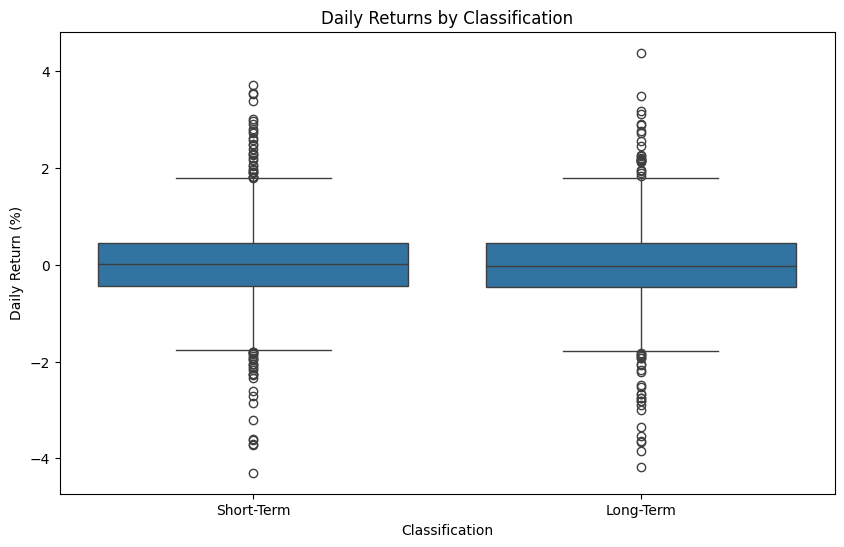

In [ ]:
# Boxplot for pattern in returns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Classification', y='Daily Return (%)')
plt.title("Daily Returns by Classification")
plt.show()

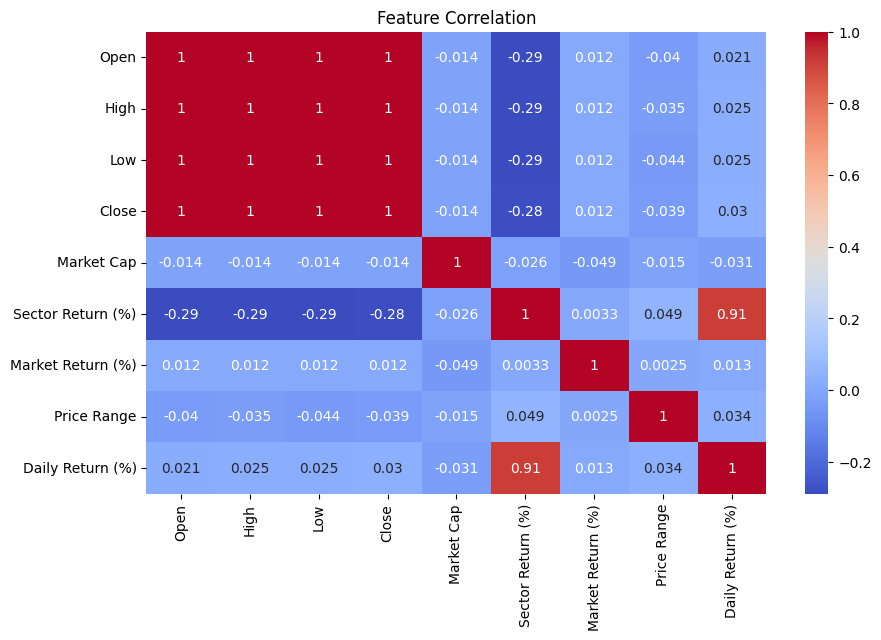

In [ ]:
# Heatmap for feature correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
# STEP 7: Handling Outliers and Data Transformations (
from scipy import stats
import numpy as np

In [ ]:
# Z-score method to remove outliers in Daily Return
z_scores = np.abs(stats.zscore(df['Daily Return (%)']))
df = df[(z_scores < 3)]

In [ ]:
# Log transform Market Cap
df['Log Market Cap'] = np.log(df['Market Cap'])

<Axes: title={'center': 'Stock Type Distribution'}, ylabel='count'>

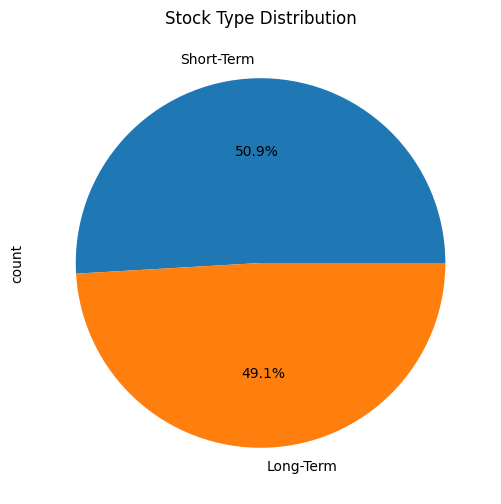

In [ ]:
# STEP 8: Initial Visual Representation of Key Findings
# Pie chart of classification
df['Classification'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Stock Type Distribution")

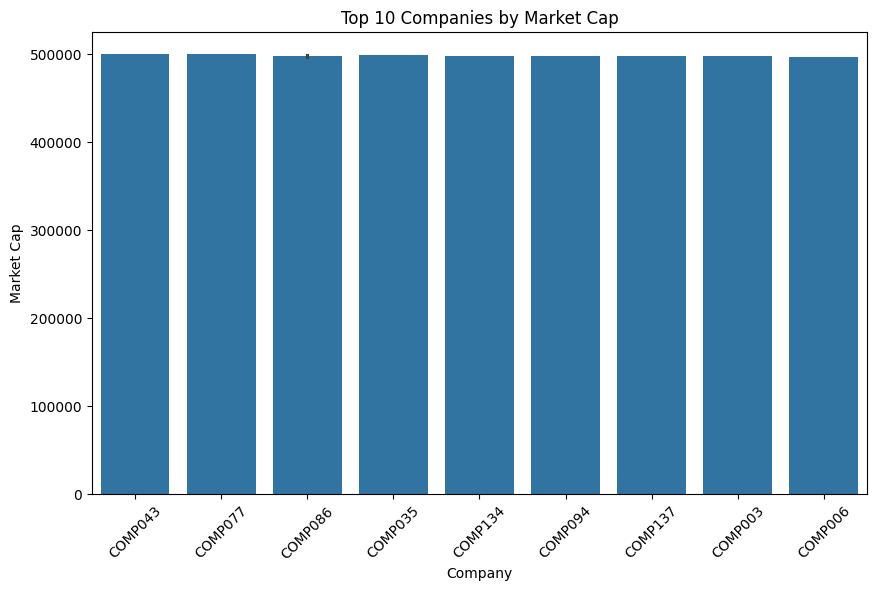

In [ ]:
# Barplot of top 10 companies by Market Cap
top10 = df.sort_values(by='Market Cap', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Company', y='Market Cap', data=top10)
plt.title("Top 10 Companies by Market Cap")
plt.xticks(rotation=45)
plt.show()
